In [1]:
# Step 1: Load dataset, split into training and test sets, and scale features
import numpy as np
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

# load boston housing price dataset
boston = load_boston()
x = boston.data
y = boston.target

# split into training and test sets, namely 80 percent of examples goes for the training, 20 percent goes for the test set
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]

# scale features by removing mean and dividing by the standard deviation
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

print(x_train_scaled.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [2]:
# Step 2: Add intercept terms and initialize parameters
# Note: If you run this step again, please run from step 1 because notebook keeps the value from the previous run
x_train_scaled = np.hstack((np.ones((x_train_scaled.shape[0],1)), x_train_scaled))
x_test_scaled = np.hstack((np.ones((x_test_scaled.shape[0],1)), x_test_scaled))
print(x_train_scaled.shape)
print(x_test_scaled.shape)

# init parameters using random values
theta = np.random.normal(loc = 0, scale = 0.5, size = (x_train_scaled.shape[1]))
print(theta)

(404, 14)
(102, 14)
[ 0.1105552   0.69133508 -0.30970917  0.60115915  0.19248408  0.04270066
 -0.04676505 -0.15962218  0.38774204  0.34467422  0.23399444 -0.58182023
 -0.26926614 -0.09857014]


In [3]:
# Step 3: Implement the gradient and the cost function
# In this step, you have to calculate the gradient. You can use the provided formula but the best way is to vectorize
# that formula for efficiency
def compute_gradient(x,y,theta):
    if len(y.shape) != 0 :
        return np.dot(x.T,np.dot(x, theta) - y)/y.shape[0]
    else:
        return np.dot(x.T,np.dot(x, theta) - y)     

def compute_cost(x,y,theta):
    if len(y.shape) != 0 :
        return mean_squared_error(y, np.dot(x, theta))/2
    else: 
        return ((y - np.dot(x, theta)) ** 2).mean()/2.

training cost: 11.391378


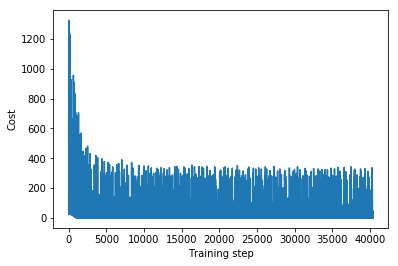

In [4]:
# Step 4: stochastic gradient descent
import matplotlib.pyplot as plt
import copy

# try different values for the learning rate
learning_rate = 0.001

# number of training iterations
num_samples = x_train_scaled.shape[0]
N_iterations = num_samples * 100 # loop over the training dataset 20 times

# prepare to plot
plt.subplot(111)

# calculate cost value and update theta
J = np.zeros(N_iterations)

# initialize new parameters using random distribution
theta_sgd = 0.5 * np.random.randn(x_train_scaled.shape[1])

for step in range(N_iterations):
    if step % num_samples == 0:
        # shuffle the training data (must be done the same way for data and targets)
        x_train_scaled, y_train = shuffle(x_train_scaled, y_train)        

    # select the next sample to train
    x_step = x_train_scaled[step % num_samples,:]
    y_step = y_train[step % num_samples]
    x_step = x_step.reshape([1,-1])

    # calculate the cost on x_step and y_step
    J[step] = compute_cost(x_step, y_step, theta_sgd)

    # update theta using a x_step and y_step
    theta_sgd -= learning_rate * compute_gradient(x_step, y_step, theta_sgd) 

# calculate the loss on the whole training set 
J_train =  compute_cost(x_train_scaled, y_train, theta_sgd)
print('training cost: %f' %J_train)
# plot cost function
plt.plot(J)
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.show()

test cost:  45.8928410426


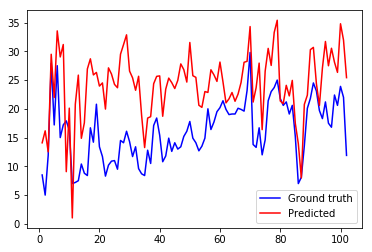

In [5]:
# Step 5
# Predict the price of house
predict_price = np.matmul(x_test_scaled,theta_sgd)

# calculate the cost for the test set
test_cost =  compute_cost(x_test_scaled, y_test, theta_sgd)
print('test cost: ',test_cost)

# plot the ground truth and the prediction
x_axis = np.linspace(1,len(y_test),len(y_test))
plt.plot(x_axis,y_test,'b',x_axis,predict_price,'r')
plt.legend(('Ground truth','Predicted'))
plt.show()

training cost: 11.556546


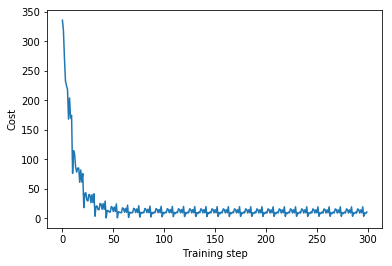

In [6]:
# Step 6: mini-batch gradient descent
import matplotlib.pyplot as plt
import copy

# try different values for the learning rate
learning_rate = 0.05

# number of training iterations
num_samples = x_train_scaled.shape[0]
batch_size = int(num_samples/10)
N_iterations = int(num_samples / batch_size) * 30  # loop over the training dataset 20 times

# prepare to plot
plt.subplot(111)

# keep the cost value for each training step
J = np.zeros(N_iterations)

# initialize new parameters using random distribution
theta_msgd = 0.5 * np.random.randn(x_train_scaled.shape[1])

start = 0
end = 0
for step in range(N_iterations):
    if step % (num_samples/batch_size) == 0:
        # shuffle the training data 
        x_train_scaled, y_train = shuffle(x_train_scaled, y_train)     

    # create a mini-batch of data to train on
    end = start + batch_size
    if end >= num_samples:
        end = num_samples
    # slice x_train_scaled and y_train from start to end to create training batch
    x_batch =  x_train_scaled[start:end,:]
    y_batch =  y_train[start:end]
    start = 0 if end >= num_samples else end
    
    # calculate the cost on x_batch and y_batch
    J[step] = compute_cost(x_batch, y_batch, theta_msgd)

    # update theta_msgd using a x_batch and y_batch
    theta_msgd -= learning_rate * compute_gradient(x_batch, y_batch, theta_msgd) 

# calculate the loss on the whole training set 
J_train =  compute_cost(x_train_scaled, y_train, theta_msgd)
print('training cost: %f' %J_train)
# plot cost function
plt.plot(J)
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.show()

test cost:  44.1964381517


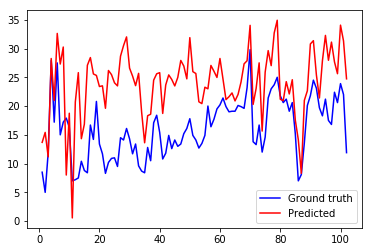

In [7]:
# Step 7
# Predict the price of house
predict_price = np.matmul(x_test_scaled,theta_msgd)

# calculate the cost for the test set
test_cost = compute_cost(x_test_scaled, y_test, theta_msgd)
print('test cost: ',test_cost)

# plot the ground truth and the prediction
x_axis = np.linspace(1,len(y_test),len(y_test))
plt.plot(x_axis,y_test,'b',x_axis,predict_price,'r')
plt.legend(('Ground truth','Predicted'))
plt.show()